In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
pd.set_option('max_columns', None)
pd.set_option('display.float_format', str)
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams["axes.edgecolor"] = "black"

# EDA notebook

Mainly exploring the data and visualizing for use later 

## Dataset initial exploration

In [2]:
df = pd.read_csv('datasets\cleaned.csv')

In [3]:
df.head(5)

,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,num_venues,venue_senti,num_stations
0,NAKHLAT JUMEIRA,25.113208,55.138932,2700000,1079,2502.32,1,2,1,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,99,8.488888888888889,0
1,NAKHLAT JUMEIRA,25.106809,55.151201,2850000,1582,1801.52,2,2,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,99,8.488888888888889,0
2,AL THANYAH FIFTH,25.063302,55.137728,1150000,1951,589.44,3,5,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,51,8.21764705882353,2
3,AL JADAF,25.227295,55.341761,2850000,2020,1410.89,2,3,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,8.0,1
4,NAKHLAT JUMEIRA,25.114275,55.139764,1729200,507,3410.65,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,99,8.488888888888889,0


In [4]:
df.columns

Index(['neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet', 'num_venues', 'venue_senti', 'num_stations'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         1844 non-null   object 
 1   latitude             1844 non-null   float64
 2   longitude            1844 non-null   float64
 3   price                1844 non-null   int64  
 4   size_in_sqft         1844 non-null   int64  
 5   price_per_sqft       1844 non-null   float64
 6   no_of_bedrooms       1844 non-null   int64  
 7   no_of_bathrooms      1844 non-null   int64  
 8   quality              1844 non-null   int64  
 9   maid_room            1844 non-null   int64  
 10  unfurnished          1844 non-null   int64  
 11  balcony              1844 non-null   int64  
 12  barbecue_area        1844 non-null   int64  
 13  built_in_wardrobes   1844 non-null   int64  
 14  central_ac           1844 non-null   int64  
 15  childrens_play_area  1844 non-null   i

## The target column (Y)

In [6]:
# General statistics
df['price'].describe()

count               1844.0
mean    2107441.4446854666
std     2949678.5712087657
min               220000.0
25%               900000.0
50%              1425000.0
75%              2200000.0
max             35000000.0
Name: price, dtype: float64

Skewness: 6.096520
Kurtosis: 47.792884


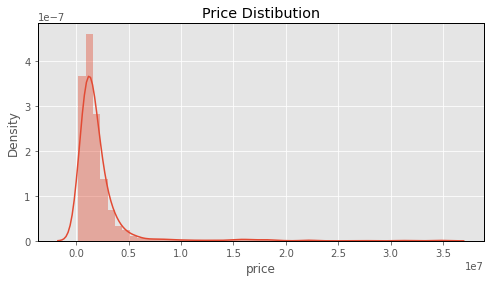

In [7]:
# Distribution
sns.distplot(df['price'])
plt.title('Price Distibution')

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

## Numerical relationships

Text(0.5, 1.0, 'Price against size (sqr foot)')

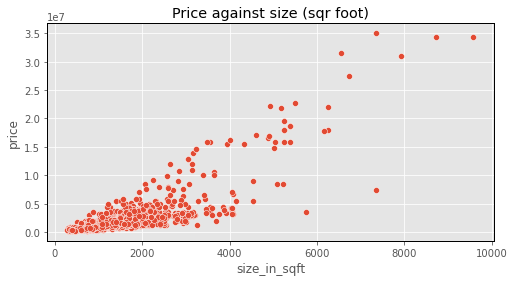

In [8]:
# Plotting price relationships
sns.scatterplot(data = df, y = 'price', x = 'size_in_sqft')
plt.title('Price against size (sqr foot)')

Text(0.5, 1.0, 'Price against #bedrooms')

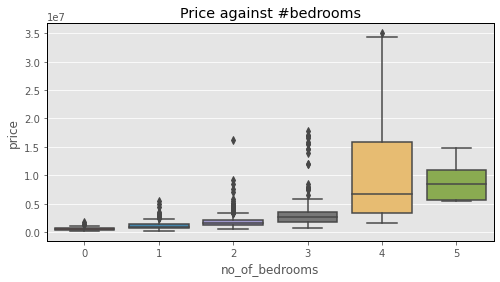

In [17]:
sns.boxplot(data = df, y = 'price', x = 'no_of_bedrooms')
plt.title('Price against #bedrooms')

Text(0.5, 1.0, 'Price against # bathrooms')

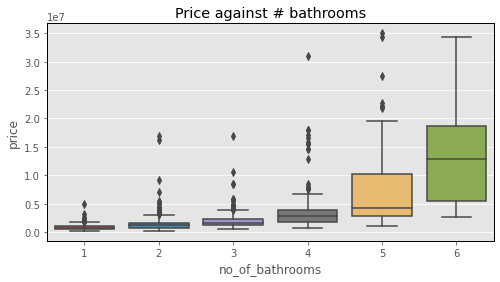

In [18]:
sns.boxplot(data = df, y = 'price', x = 'no_of_bathrooms')
plt.title('Price against # bathrooms')

Text(0.5, 1.0, 'Price against quality')

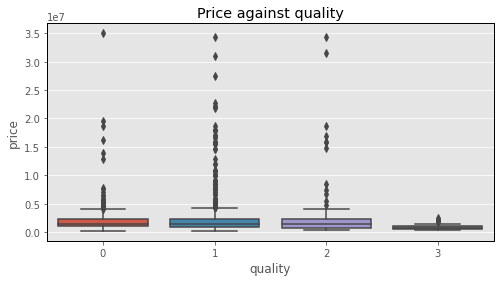

In [19]:
# This doesn't make any sense. The quality column must be bunk.
sns.boxplot(data = df, y = 'price', x = 'quality')
plt.title('Price against quality')

### Check categorical

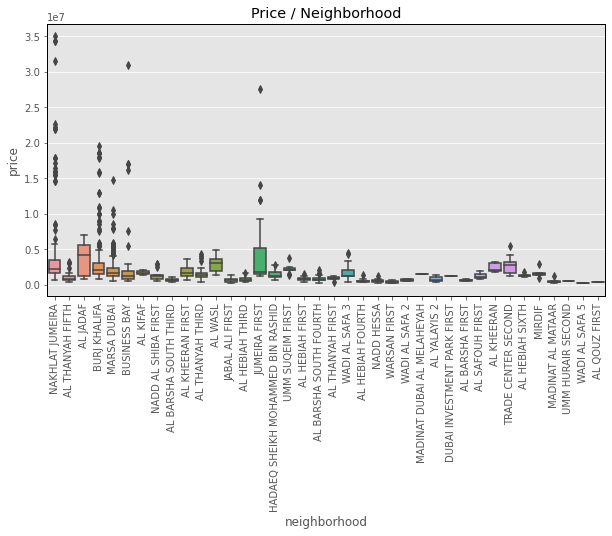

In [58]:
plt.subplots(figsize=(10, 5))
sns.boxplot(data = df, y = 'price', x = 'neighborhood')
plt.title('Price / Neighborhood')
plt.xticks(rotation = 90)
plt.show()

## Check booleans

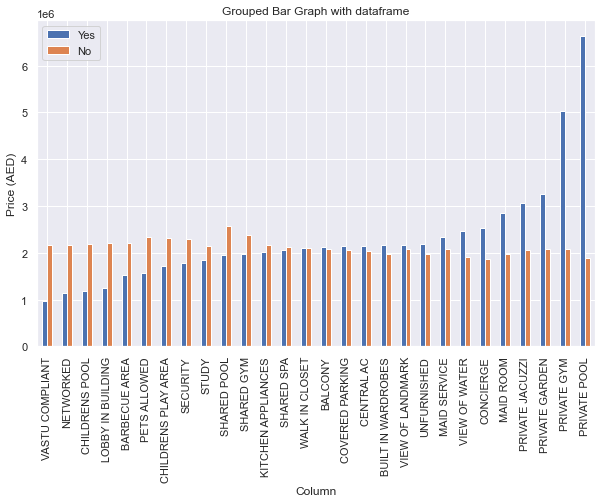

In [108]:
# Columns with boolean values. 
bool_cols = ['maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet']

# Making new dataframe to make plotting Bool columns easier
df_boolplot = pd.DataFrame({
    
'Column':[name.replace('_',' ').upper() for name in bool_cols],
'Yes':[df.loc[df[col] == 1]['price'].mean() for col in bool_cols],
'No':[df.loc[df[col] == 0]['price'].mean() for col in bool_cols]  
})

df_boolplot.sort_values(by = ['Yes']).plot(x = 'Column',
                kind = 'bar',
                stacked = False,
                title = 'Grouped Bar Graph with dataframe',
                figsize = (10,6))
plt.ylabel('Price (AED)')
plt.show()

## Check correlations

Text(0.5, 1.0, 'Correlation matrix')

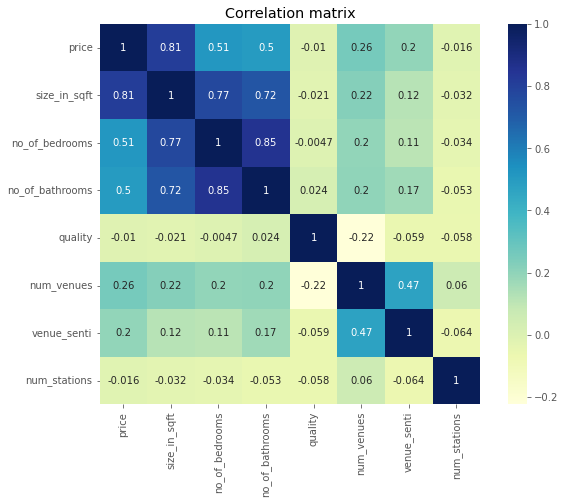

In [39]:
# Numerical columns
# Yes most are numeric but I want to ignore encoded values
num_cols = [ 'price', 'size_in_sqft','no_of_bedrooms',
            'no_of_bathrooms', 'quality','num_venues',
            'venue_senti', 'num_stations']

plt.subplots(figsize=(10, 7))
sns.heatmap(df[num_cols].corr(), square=True, annot = True,cmap="YlGnBu")
plt.title('Correlation matrix')

Price is extremely strongly correlated with the size of the apartment. 